In [17]:
pip install kagglehub


  Using cached pyyaml-6.0.3-cp312-cp312-win_amd64.whl.metadata (2.4 kB)
Using cached pyyaml-6.0.3-cp312-cp312-win_amd64.whl (154 kB)

   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]

Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [03:03<00:00, 2.45MB/s] 

Extracting files...


Path to dataset files: C:\Users\kbhuv\.cache\kagglehub\datasets\techsash\waste-classification-data\versions\1


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [33]:
train_path = r"C:\Users\kbhuv\.cache\kagglehub\datasets\techsash\waste-classification-data\versions\1\DATASET\DATASET\TRAIN"
test_path  = r"C:\Users\kbhuv\.cache\kagglehub\datasets\techsash\waste-classification-data\versions\1\DATASET\DATASET\TEST"


In [28]:
#Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [34]:
import os
print(os.listdir(train_path))
print(os.listdir(test_path))



['O', 'R']
['O', 'R']


In [35]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os

# Visualization
x_data = []
y_data = []

for category in glob(os.path.join(train_path, '*')):
    for file in tqdm(glob(os.path.join(category, '*'))):
        img_array = cv2.imread(file)
        
        # Skip if image is not loaded properly
        if img_array is None:
            print(f"⚠️ Skipping invalid file: {file}")
            continue
        
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))

data = pd.DataFrame({'image': x_data, 'label': y_data})
print("✅ DataFrame created successfully:", data.shape)


100%|██████████| 9999/9999 [00:13<00:00, 765.12it/s] 

✅ DataFrame created successfully: (22564, 2)


In [36]:
data.shape


(22564, 2)

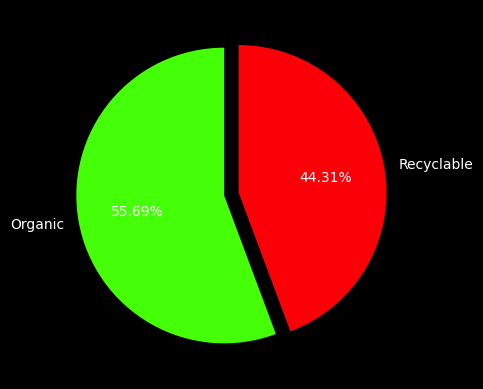

In [37]:
colors =['#44FF07','#FB0007']
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'] , startangle=90 , colors=colors,explode=[0.05,0.05], autopct='%0.2f%%')
plt.show()

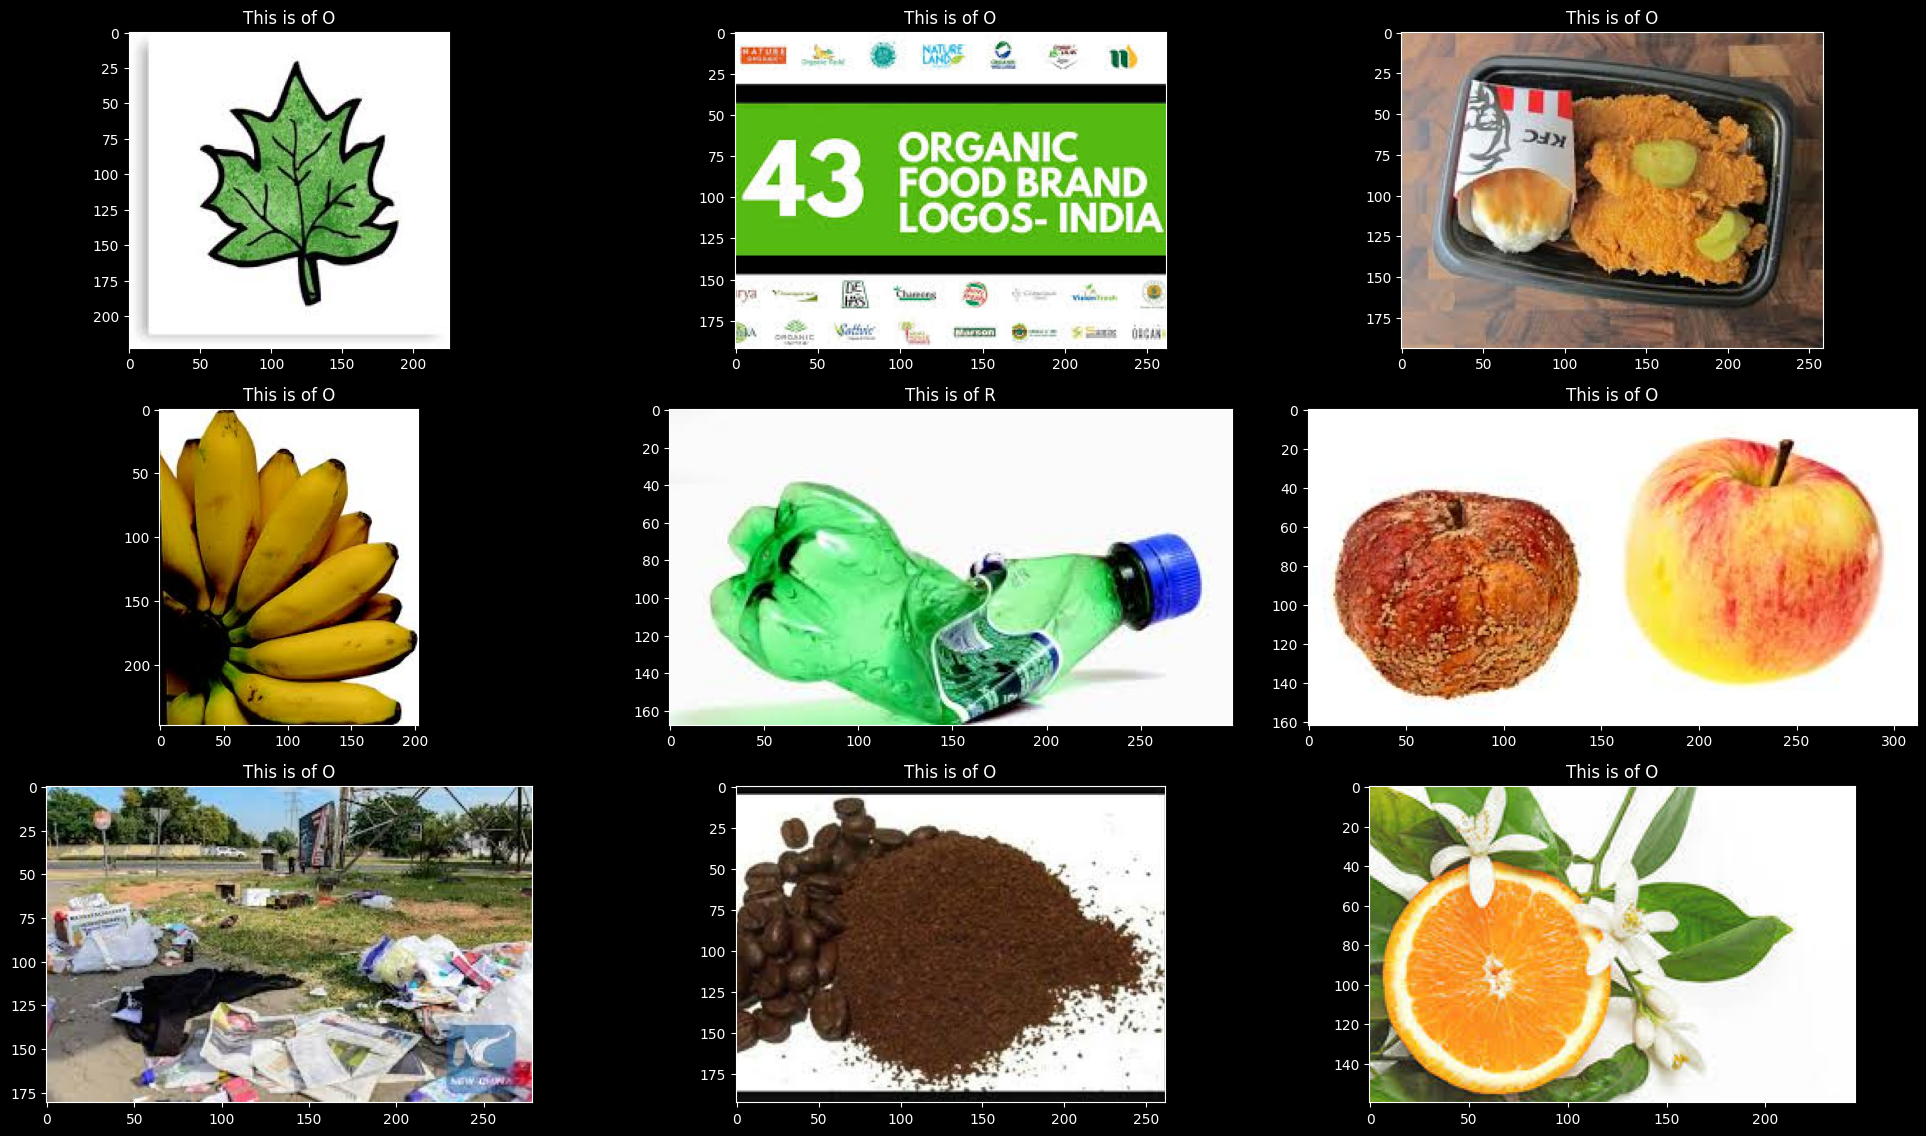

In [38]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [12]:
#building a CNN model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics =["accuracy"])
batch_size=64

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
train_datagen=ImageDataGenerator(rescale=1./255)


In [41]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [42]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [43]:
hist=model.fit(train_generator,epochs=15,validation_data=test_generator)

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 579s 2s/step - accuracy: 0.8043 - loss: 0.4703 - val_accuracy: 0.8922 - val_loss: 0.3234
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.8445 - loss: 0.3866 - val_accuracy: 0.8595 - val_loss: 0.3375
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.8579 - loss: 0.3548 - val_accuracy: 0.8938 - val_loss: 0.2896
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 554s 2s/step - accuracy: 0.8709 - loss: 0.3231 - val_accuracy: 0.8898 - val_loss: 0.2872
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - accuracy: 0.8872 - loss: 0.2892 - val_accuracy: 0.8993 - val_loss: 0.2485
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - accuracy: 0.9057 - loss: 0.2511 - val_accuracy: 0.9049 - val_loss: 0.2605
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 533s 2s/step - accuracy: 0.9186 - loss: 0.2161 - val_accuracy: 0.8969 - val_loss: 0.3104
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 532s 2s/step - accuracy: 0.9359 - loss: 0.1704 - val_accu

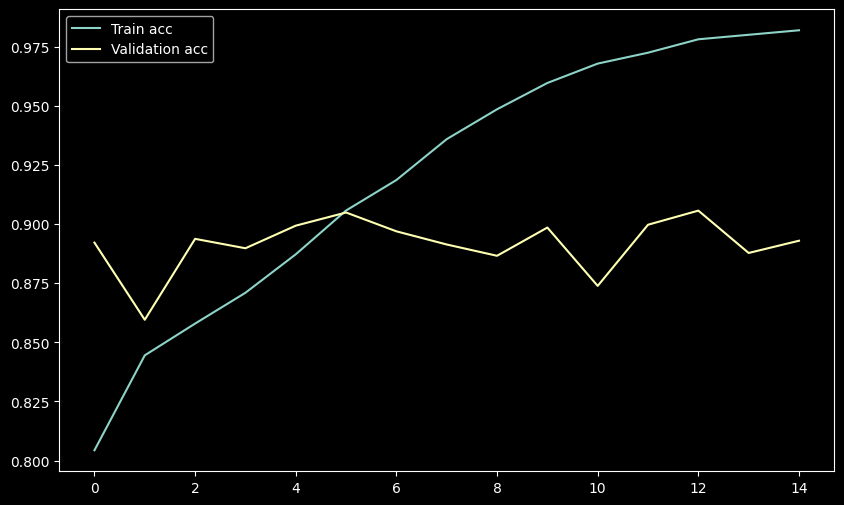

In [44]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

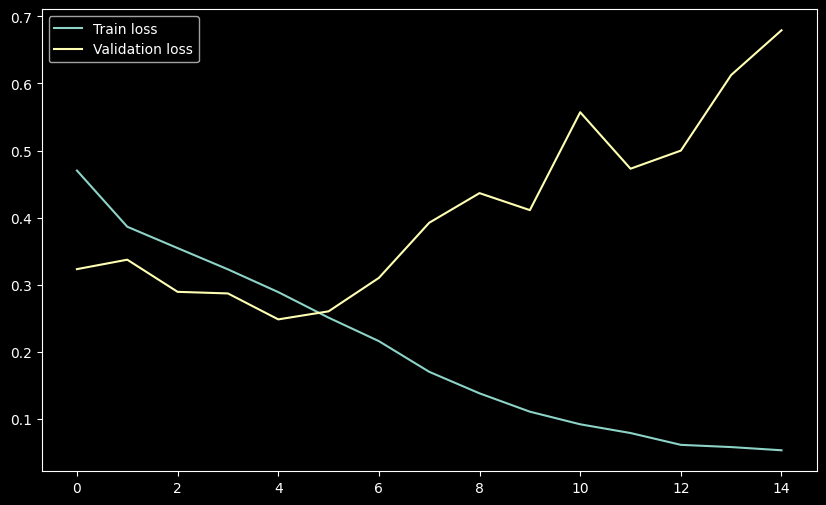

In [46]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [47]:
def predict_func(img): 
    # Show the image
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Preprocess
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32") / 255.0  # Normalize if not already done
    img = np.reshape(img, (1, 224, 224, 3))

    # Predict
    pred = model.predict(img)[0][0]  # Get the single output value

    # Decision threshold
    if pred >= 0.5:
        print("\033[94mThis image -> Organic (Confidence: {:.2f})\033[0m".format(pred))
    else:
        print("\033[94mThis image -> Recyclable (Confidence: {:.2f})\033[0m".format(1 - pred))

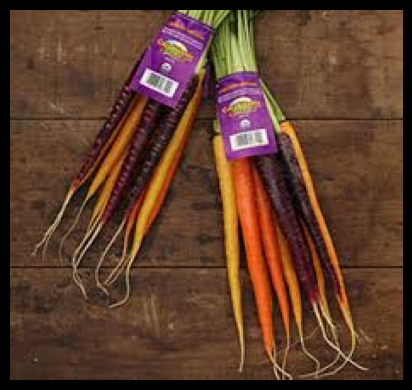

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
This image -> Recyclable (Confidence: 1.00)


In [50]:
# ✅ Load test image correctly
test_img = cv2.imread(r"C:\Users\kbhuv\.cache\kagglehub\datasets\techsash\waste-classification-data\versions\1\DATASET\DATASET\TEST\O\O_12573.jpg")

# Predict
predict_func(test_img)


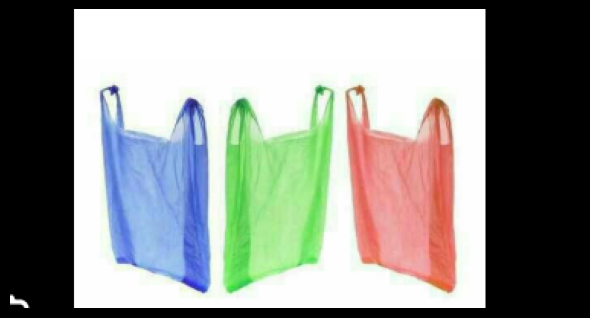

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This image -> Recyclable (Confidence: 1.00)


In [54]:
test_img = cv2.imread(r"C:\Users\kbhuv\OneDrive\Desktop\CNN_Waste_Classification-main\image.png")
predict_func(test_img)

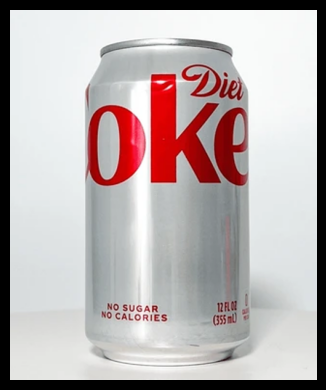

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This image -> Recyclable (Confidence: 1.00)


In [52]:
test_img = cv2.imread(r"C:\Users\kbhuv\OneDrive\Desktop\CNN_Waste_Classification-main\Screenshot 2025-11-09 102354.png")
predict_func(test_img)

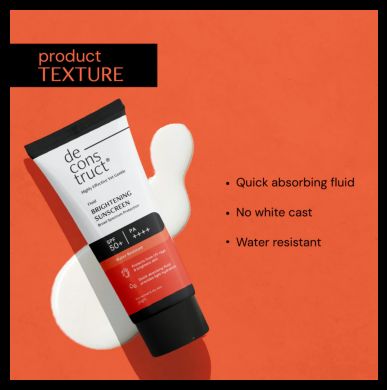

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This image -> Recyclable (Confidence: 1.00)


In [53]:
test_img = cv2.imread(r"C:\Users\kbhuv\OneDrive\Desktop\CNN_Waste_Classification-main\BrighteningSunscreenListingImagesArtboard4.webp")
predict_func(test_img)